## Name: Daniel Kojo Afealete Fiadjoe
## Student ID: 202291439
## Course: DSCI-6601-001 (Pract Machine Learning 77223)
## Assignment 4

### Import Libraries

In [203]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from scipy import optimize

# Libraries to split data, create simple linaer regression 
from sklearn.model_selection import train_test_split
import math
import statistics 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

## Question 1

Consider a 3rd order polynomial:
- f(x) = a0 + a1x + a2x2 + a3x3

Suppose we are given a set of samples of this function (xi, yi)) for 1 <= i <= N.

The least squares residual is given by R = (yi - f(xi))

Using calculus, determine the values for a0, a1, a2, and a3 that minimize this residual. Hint
1: consider where the residual R is at a minimum. Hint 2: Try to write in matrix form in
terms of a linear system of equations. Write a0, a1, a2, and a3 in those terms.

In [140]:
# Create the required samples, x_i 
N =100
x_i = np.arange(1, N, 0.15)

# Calculate the y_i from the sample, x_i
y_i = 1 + x_i + x_i**2 + x_i**3

In [141]:
# Create a matrix mat for the vertically stack elements 
len_1 = len(x_i)

mat = np.vstack([np.ones(len_1),x_i,x_i**2,xi**3]).T
                                      
print(mat)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.15000000e+00 1.32250000e+00 1.52087500e+00]
 [1.00000000e+00 1.30000000e+00 1.69000000e+00 2.19700000e+00]
 ...
 [1.00000000e+00 9.95500000e+01 9.91020250e+03 9.86560659e+05]
 [1.00000000e+00 9.97000000e+01 9.94009000e+03 9.91026973e+05]
 [1.00000000e+00 9.98500000e+01 9.97002250e+03 9.95506747e+05]]


In [142]:
#Numpy column vector creation for y_i
y_i = y_i[:,np.newaxis]


#Calculating all the coefficient.
c_xy = np.dot((np.dot(np.linalg.inv(np.dot(mat.T,mat)),mat.T)),y_i)

print("The list of cofficients are:", c_xy)

The list of cofficients are: [[1.00000009]
 [1.        ]
 [1.        ]
 [1.        ]]


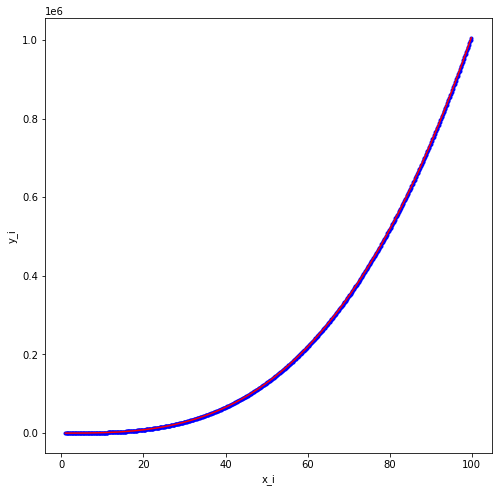

In [139]:
# The polynomial reconstructing based on the new coefficient.
new_y_i = 1 + c_xy[0]*x_i + c_xy[1]*x_i**2 + c_xy[2]*x_i**3

# Plotting the new polynomial with the new coefficient
plt.figure(num=1,figsize = (8,8))
plt.plot(x_i, yi, 'b.')
plt.plot(x_i, new_y_i, 'r')
plt.xlabel('x_i')
plt.ylabel('y_i')
plt.show()

## Question 2

Consider the function f(x) = xsin(x). Write code to take samples of this function (at least
50). Add normally-distributed random noise to the function (e.g. use np.random.normal).
Reconstruct the function using the given samples using polynomial models as we did in
class. Try this reconstruction over at least 5 different polynomial orders (suggest linear up
to 5th order). Which order of polynomial gives the best reconstruction and why? Use the
model assessment methodology we have discussed in class.

In [177]:
# Loop to calculate the function with 50 samples

i=0
while i <= 120:
 x1 = np.arange(0,120,1)
 y1 = ((x1 * np.sin(x1)) + np.random.normal(scale=1,size=(len(x1))))
 i=i+1
print ("Printing y1 for xsin(x): ", y1) 

Printing y1 for xsin(x):  [  -0.23963884    0.85825052    1.66876311    0.13280107   -1.82057124
   -3.05604931   -3.84451495    3.13743125    7.29657513    4.72895901
   -4.46053437  -12.02936485   -5.66510125    4.67659949   13.42636219
   11.62476178   -5.23915737  -15.90661667  -12.75945967    4.41245534
   20.37662351   18.3317005    -0.47938288  -21.37936119  -22.37918393
   -2.68632065   18.96108771   24.91454158    8.17955961  -19.10527503
  -29.27854542  -11.11248432   17.42866001   33.3191156    19.22272132
  -16.87642     -36.92162128  -23.78906382   12.76121974   37.98528767
   28.9512512    -4.73668863  -37.18943388  -36.35999897    2.77765528
   38.43133509   42.01873042    5.70378495  -38.06459195  -48.29271178
  -13.4083989    31.7958178    50.97163859   21.00846472  -30.5114362
  -55.02502551  -28.1760966    23.84436945   57.45066818   38.57158992
  -17.17693691  -59.28617334  -45.31099952    9.3402222    58.85422149
   52.55256889   -0.90888641  -58.09596002  -61.6720

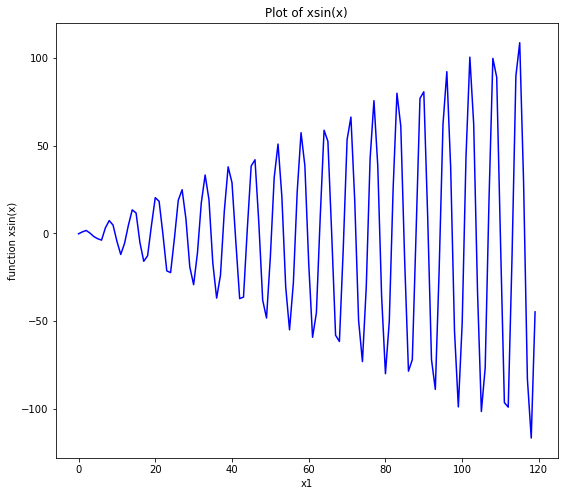

In [179]:
# Plotting function for the samples.
plt.figure(num=2,figsize=(9,8))
plt.plot(x1,y1,'b')
plt.xlabel('x1')
plt.ylabel('function xsin(x)')
plt.title("Plot of xsin(x)")
plt.show()

In [222]:
# Creating the train data and function to calculate the xsin(x) function.
def fun_xsin(aa):
    return ((aa * np.sin(aa)) + np.random.normal(scale=1,size=(len(aa))))

x2 =  np.arange(0,120,1)
y2 =  f(x2)


rand_state = np.random.RandomState(0)
x2_train = np.linspace(0,120,100)
x2_train =  np.sort(rand_state.choice(x2_train,size=70,replace=False))
y2_train = fun_xsin(x2_train)

x2 =   x2[:,np.newaxis]
x2_train =  x2_train[:,np.newaxis]

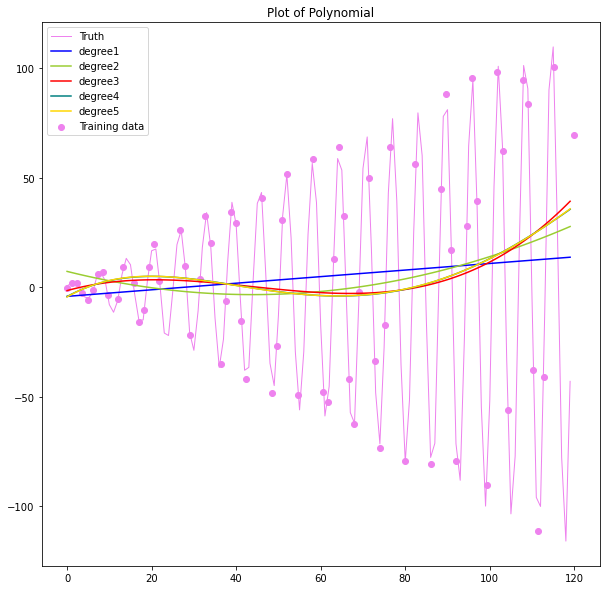

In [223]:
# Fitting the polynomial.
wth =1
fig, ax = plt.subplots(figsize=(10,10))
ax.set_prop_cycle(color=["violet","blue","yellowgreen","red","teal","gold"])
ax.plot(x2,y2,linewidth=wth,label="Truth")
ax.scatter(x2_train, y2_train, label ="Training data")

for degree in [1,2,3,4,5]:
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(x2_train,y2_train)
    y2_predict = polynomial_model.predict(x2)
    ax.plot(x2,y2_predict, label=f"degree{degree}")
plt.title("Plot of Polynomial")    
plt.legend()
plt.show()

Best degree 3 with RMSE 49.1527756304172


Text(0, 0.5, 'Root meam square error')

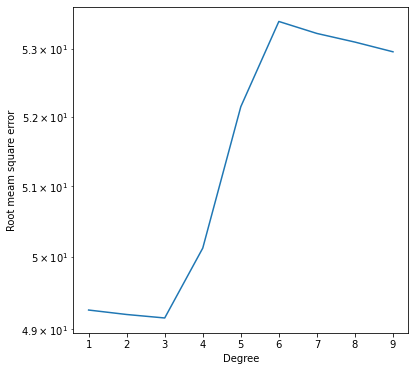

In [225]:
# Reconstructng of polynomial orders.

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3)

rmses_2 = []
degrees_2 = np.arange(1, 10)
min_rmse_2, min_deg_2 = 1e10, 0

for deg_2 in degrees_2:

    # Train features
    poly_features_2 = PolynomialFeatures(degree=deg_2, include_bias=False)
    x2_poly_train = poly_features_2.fit_transform(x2_train)

    # Linear regression
    poly_reg2 = LinearRegression()
    poly_reg2.fit(x2_poly_train, y2_train)

    # Compare with test data
    x2_poly_test = poly_features_2.fit_transform(x2_test)
    poly_predict_2 = poly_reg2.predict(x2_poly_test)
    poly_mse_2 = mean_squared_error(y2_test, poly_predict_2)
    poly_rmse_2 = np.sqrt(poly_mse_2)
    rmses_2.append(poly_rmse_2)
    
    # Cross-validation of degree
    if min_rmse_2 > poly_rmse_2:
        min_rmse_2 = poly_rmse_2
        min_deg_2 = deg_2

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg_2, min_rmse_2))
        
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(degrees_2, rmses_2)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('Root meam square error')


The best reconstruct polynomial was decided by picking the lowerest root mean square error (RMSE). At th time of submitting the work, the best was model 3. 

## Question 3

#### Question 3a

Consider a model of the form:
- 1 + x + x^2 + log(x)
- a. Plot this function.

Values of x:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
Values of y:  [  3.           7.69314718  14.09861229  22.38629436  32.60943791
  44.79175947  58.94591015  75.07944154  93.19722458 113.30258509
 135.39789527 159.48490665 185.56494936 213.63905733 243.7080502
 275.77258872 309.83321334 345.89037176 383.94443898 423.99573227
 466.04452244 510.09104245 556.13549422 604.17805383 654.21887582
 706.25809654 760.29583687 816.33220451 874.36729583]


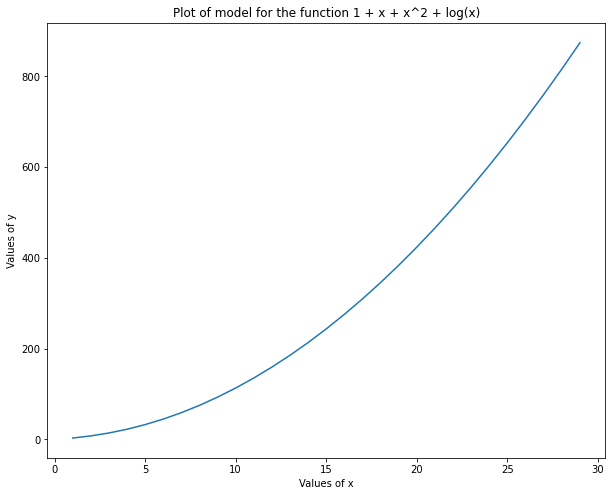

In [180]:
# Plotting the function y = 1 + x + x^2 + log(x) with randomly generated data.
x = np.arange(1, 30, 1)
y = 1 + x + (x**2) + np.log(x)
 
print('Values of x: ', x)
print('Values of y: ', y)
plt.figure(num=2,figsize=(10,8))
plt.plot(x, y)
plt.title("Plot of model for the function 1 + x + x^2 + log(x)")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()

### Question 3b

Generate a number of samples of this function and plot it. Add some random, normally-distributed noise to this function.

In [66]:
# Generate sample numbers
x_2 = np.arange(1,100,1)
x_2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

Values of y:  [3.00000000e+00 7.69314718e+00 1.40986123e+01 2.23862944e+01
 3.26094379e+01 4.47917595e+01 5.89459101e+01 7.50794415e+01
 9.31972246e+01 1.13302585e+02 1.35397895e+02 1.59484907e+02
 1.85564949e+02 2.13639057e+02 2.43708050e+02 2.75772589e+02
 3.09833213e+02 3.45890372e+02 3.83944439e+02 4.23995732e+02
 4.66044522e+02 5.10091042e+02 5.56135494e+02 6.04178054e+02
 6.54218876e+02 7.06258097e+02 7.60295837e+02 8.16332205e+02
 8.74367296e+02 9.34401197e+02 9.96433987e+02 1.06046574e+03
 1.12649651e+03 1.19452636e+03 1.26455535e+03 1.33658352e+03
 1.41061092e+03 1.48663759e+03 1.56466356e+03 1.64468888e+03
 1.72671357e+03 1.81073767e+03 1.89676120e+03 1.98478419e+03
 2.07480666e+03 2.16682864e+03 2.26085015e+03 2.35687120e+03
 2.45489182e+03 2.55491202e+03 2.65693183e+03 2.76095124e+03
 2.86697029e+03 2.97498898e+03 3.08500733e+03 3.19702535e+03
 3.31104305e+03 3.42706044e+03 3.54507754e+03 3.66509434e+03
 3.78711087e+03 3.91112713e+03 4.03714313e+03 4.16515888e+03
 4.2951743

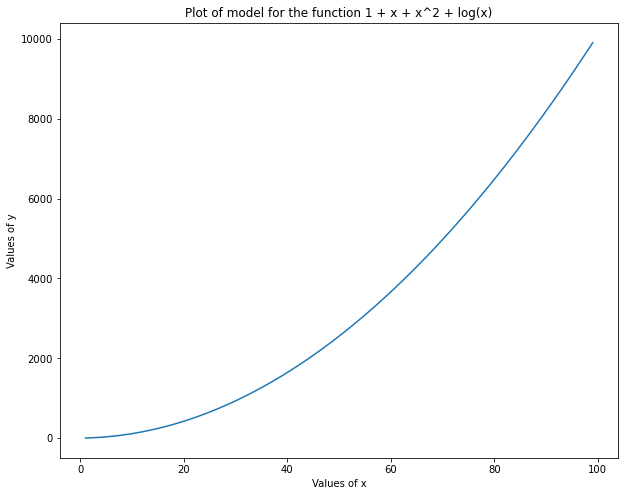

In [217]:
y_2 = 1 + x_2 + (x_2**2) + np.log(x_2)
y_2
print('Values of y: ', y_2)
plt.figure(num=2,figsize=(10,8))
plt.plot(x_2, y_2)
plt.title("Plot of model for the function 1 + x + x^2 + log(x)")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()

Values of y:  [-7.09996828e+00  1.04436047e+01  8.11780950e+00  4.38356748e+00
  3.42563837e+01  2.00464936e+01  7.92910445e+01  5.78592438e+01
  1.00939164e+02  1.21633824e+02  1.25928724e+02  1.70565758e+02
  1.89475655e+02  2.31903392e+02  2.42218103e+02  2.72650591e+02
  3.19752775e+02  3.23306368e+02  3.78099704e+02  4.09711064e+02
  4.82944290e+02  5.17165220e+02  5.62986073e+02  5.85575145e+02
  6.42394047e+02  7.17726807e+02  7.47242566e+02  8.02399506e+02
  8.57283096e+02  9.12548323e+02  9.92897240e+02  1.06560851e+03
  1.11805346e+03  1.20908824e+03  1.24970577e+03  1.33540088e+03
  1.41557518e+03  1.50110929e+03  1.57171291e+03  1.64292036e+03
  1.70787928e+03  1.82003010e+03  1.90057154e+03  1.97363376e+03
  2.07214258e+03  2.15729547e+03  2.25545053e+03  2.32981988e+03
  2.44166144e+03  2.53752060e+03  2.68475556e+03  2.76321930e+03
  2.84593640e+03  2.97703680e+03  3.08359341e+03  3.20184031e+03
  3.29983830e+03  3.41441444e+03  3.56118972e+03  3.65539641e+03
  3.7704868

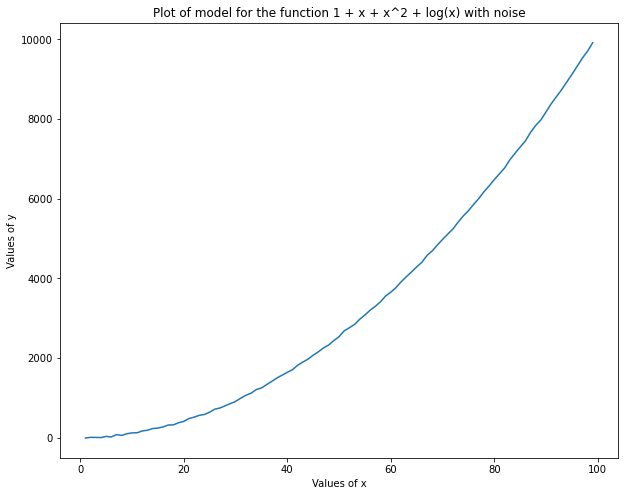

In [219]:
# Adding noise to the function
y_2 = 1 + x_2 + (x_2**2) + np.log(x_2) + (np.random.normal(scale=15,size=(len(x_2))))
y_2
print('Values of y: ', y_2)
plt.figure(num=2,figsize=(10,8))
plt.plot(x_2, y_2)
plt.title("Plot of model for the function 1 + x + x^2 + log(x) with noise")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()

### Question 3c

Reconstruct the original function from samples of the random noisey function in scikit
learn. Considering your knowledge here, What model would best work here? Implement this
using Scikit-learn. Compare your choice of model to a linear and k-NN model. Searching
over k for best value for your comparison.
Show plots of these functions (including the ground truth) simultaneously.

In [226]:
def target_generator(x4, add_noise=False):
    target = 1 + x + (x**2) + np.log(4)
    if add_noise:
        rng = np.random.RandomState(1)
        target += rng.normal(0, 0.3, size=target.shape)
    return target.squeeze()

In [228]:
xx = np.arange(1, 30, 1)
y4 = target_generator(xx, add_noise=False)
y4

array([  4.38629436,   8.38629436,  14.38629436,  22.38629436,
        32.38629436,  44.38629436,  58.38629436,  74.38629436,
        92.38629436, 112.38629436, 134.38629436, 158.38629436,
       184.38629436, 212.38629436, 242.38629436, 274.38629436,
       308.38629436, 344.38629436, 382.38629436, 422.38629436,
       464.38629436, 508.38629436, 554.38629436, 602.38629436,
       652.38629436, 704.38629436, 758.38629436, 814.38629436,
       872.38629436])

Text(0, 0.5, 'y')

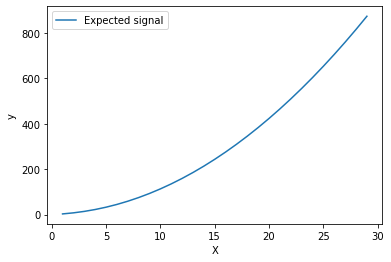

In [229]:
plt.plot(xx, y, label="Expected signal")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")